In [1]:
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from data import *
from model import *
from image_function import *
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
data_dir = 'Data\\sample3\\' # image folder

In [3]:
data_folder = data_dir #put your folder where you stored the annotated data
save_folder = data_dir+'aug' #put your folder where you want stored the augmentation data

In [4]:
def focal_loss(gamma=2, alpha=0.75):
    def focal_loss_fixed(y_true, y_pred):#with tensorflow
        eps = 1e-12
        y_pred=K.clip(y_pred,eps,1.-eps)#improve the stability of the focal loss 
        pt_1 = tf.where(tf.equal(y_true, 1), y_pred, tf.ones_like(y_pred))
        # when y_true == 1, outut y_pred, otherwise output 1
        pt_0 = tf.where(tf.equal(y_true, 0), y_pred, tf.zeros_like(y_pred))
        # when y_true == 0, outut y_pred, otherwise output 0
        return -K.sum(alpha * K.pow(1. - pt_1, gamma) * K.log(pt_1))\
                -K.sum((1-alpha)* K.pow( pt_0, gamma) * K.log(1. - pt_0))
    return focal_loss_fixed

In [5]:
data_gen_args = dict(rotation_range=1,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')
myGenerator = trainGenerator(10,data_folder,'image','mask',data_gen_args,save_to_dir = save_folder)

In [8]:
model = unet()
focal_loss_fixed = focal_loss()

model.compile(optimizer = Adam(lr = 1e-4), loss = focal_loss_fixed, metrics = ['accuracy'])
model_checkpoint = ModelCheckpoint('unet_focal_loss.h5', monitor='loss',verbose=1, save_best_only=True)
model.fit_generator(myGenerator,steps_per_epoch=500,epochs=15,callbacks=[model_checkpoint], class_weight=[2.9, 0.1])

Epoch 1/15
500/500 [==============================] - 107s 214ms/step - loss: 2297.4827 - acc: 0.9926

Epoch 00001: loss improved from inf to 2310.31725, saving model to unet_focal_loss.h5
Epoch 2/15
500/500 [==============================] - 104s 209ms/step - loss: 897.8356 - acc: 0.9953

Epoch 00002: loss improved from 2310.31725 to 903.53195, saving model to unet_focal_loss.h5
Epoch 3/15
500/500 [==============================] - 107s 214ms/step - loss: 862.7885 - acc: 0.9953

Epoch 00003: loss improved from 903.53195 to 868.52004, saving model to unet_focal_loss.h5
Epoch 4/15
500/500 [==============================] - 106s 212ms/step - loss: 839.4567 - acc: 0.9953

Epoch 00004: loss improved from 868.52004 to 843.21867, saving model to unet_focal_loss.h5
Epoch 5/15
500/500 [==============================] - 109s 218ms/step - loss: 827.7731 - acc: 0.9952

Epoch 00005: loss improved from 843.21867 to 832.28944, saving model to unet_focal_loss.h5
Epoch 6/15
500/500 [==================

In [9]:
data, fs = load_images_from_folder(data_dir + 'Validate',  resize = True) # load validation data
data = np.expand_dims (data, axis = 3) # keras used channel last by default
np.shape(data)

C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


(882, 256, 256, 1)

In [14]:
results = model.predict(data)

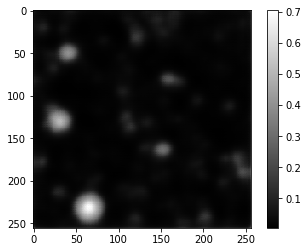

In [21]:
plt.imshow(results[230,:,:,0], cmap = 'gray')
plt.colorbar()

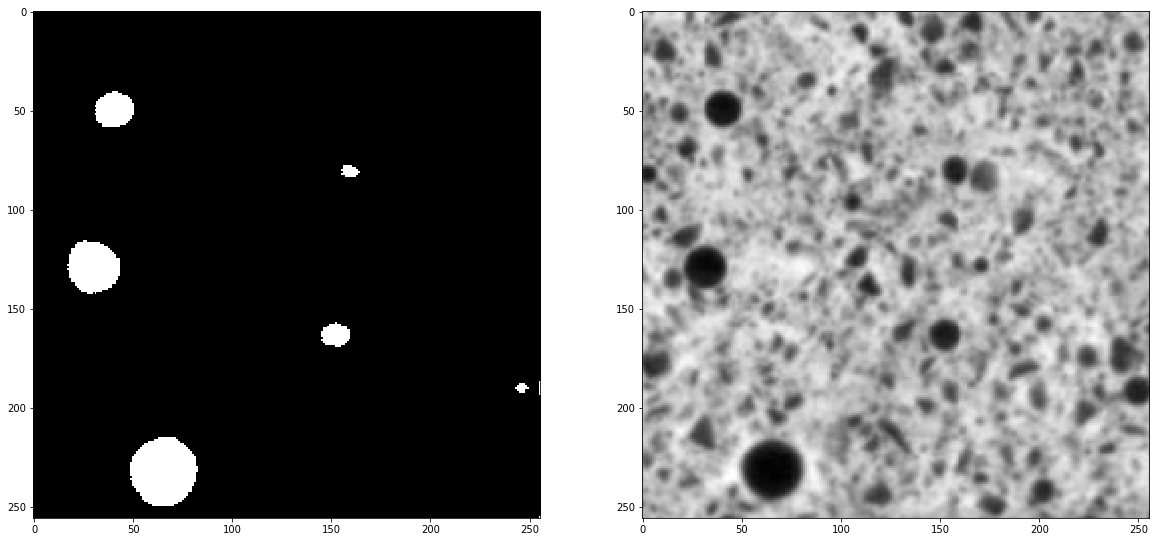

In [28]:
plt.figure(figsize = (20,10))
plt.subplot(121)
plt.imshow(results[230,:,:,0]>0.2, cmap = 'gray')
plt.subplot(122)
plt.imshow(data[230,:,:,0], cmap = 'gray')
